In [41]:
      #NAME: INSHRAH ALAM    SEC :G3  ROLL NUM L1f22BSCS0384


In [43]:
#install library
!pip install nltk gensim

In [3]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Latitude\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
##Task 1: Load and Preprocess the Dataset
import pandas as pd
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load CSV, fix encoding issues that may appear
df = pd.read_csv("test.csv", encoding='latin1') 

# Confirm correct column for text data
print(df.columns)  
print(df.head())
# Prepare and clean sentences
data = df['text'].dropna().tolist()
sentences = [
    [word for word in simple_preprocess(line) if word not in stop_words]
    for line in data if isinstance(line, str) and line.strip()
]
print()
print("Sample cleaned sentence:", sentences[0])


Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra      

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Latitude\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#Task 2: Train Word2Vec Model


from gensim.models import Word2Vec

# Train CBOW Model (sg=0)
cbow_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=0
)

# Save model
cbow_model.save("word2vec_cbow.model")



In [22]:
# Task 3: Explore Similar Words
example_word = 'happy'
print()

similar_words = cbow_model.wv.most_similar(example_word, topn=5)
print()

print(f"Words similar to {example_word}:")
for word, score in similar_words:
    print(f"{word}: {score}")

print()




Words similar to happy:
day: 0.9891807436943054
got: 0.9862824082374573
get: 0.9857239127159119
go: 0.9850502014160156
really: 0.9845701456069946



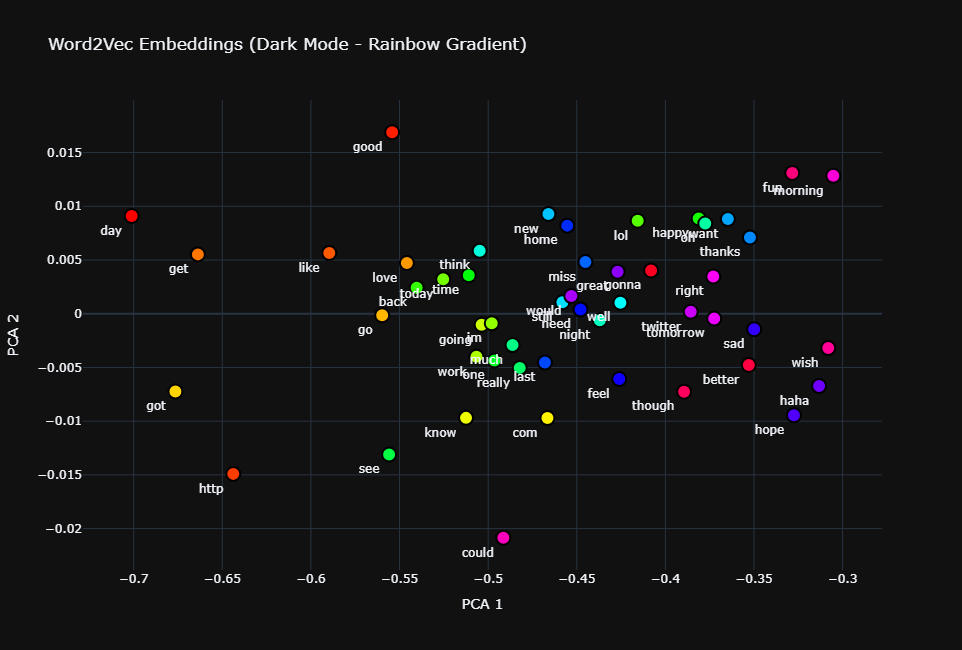

In [53]:

#Task 4: Visualize Words using PCA



rainbow_colors = ['hsl({}, 100%, 50%)'.format(int(360*i//n_show)) for i in range(n_show)]

fig_rainbow = go.Figure()
fig_rainbow.add_trace(
    go.Scatter(
        x=result[:, 0],
        y=result[:, 1],
        mode='markers+text',
        text=words_to_show,
        textposition='bottom left',
        marker=dict(size=14, color=rainbow_colors, line=dict(width=2, color='black')),
    )
)

fig_rainbow.update_layout(
    title='Word2Vec Embeddings (Dark Mode - Rainbow Gradient)',
    xaxis_title='PCA 1',
    yaxis_title='PCA 2',
    width=950,
    height=650,
    template='plotly_dark'
)

fig_rainbow.show()


In [54]:
##Task 5: CBOW vs Skip-Gram Comparison
skipgram_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)

example_words = ['happy', 'sad', 'love', 'night', 'school']

for ex_word in example_words:
    print(f"\n**CBOW Similar Words for '{ex_word}':**")
    try:
        for word, score in cbow_model.wv.most_similar(ex_word):
            print(f"{word}: {score}")
    except KeyError:
        print(f"'{ex_word}' not in CBOW model vocabulary.")

    print(f"\n**Skip-Gram Similar Words for '{ex_word}':**")
    try:
        for word, score in skipgram_model.wv.most_similar(ex_word):
            print(f"{word}: {score}")
    except KeyError:
        print(f"'{ex_word}' not in Skip-Gram model vocabulary.")

print("\n--- Assessment (Which is Best?) ---")
print()
print("Reviewing the lists above:")
print()
print("- **CBOW** is usually better for frequent and common words, with smoother, more general associations.")
print()
print("- **Skip-Gram** excels at learning about less common words and can capture rare but meaningful relationships.")
print()
print("Usually, Skip-Gram performs better on smaller datasets or when  interested in rare words, "
      "while CBOW can be faster and more stable with large, uniform corpora.")



**CBOW Similar Words for 'happy':**
day: 0.9891807436943054
got: 0.9862824082374573
get: 0.9857239127159119
go: 0.9850502014160156
really: 0.9845701456069946
good: 0.9835202097892761
great: 0.9833927154541016
miss: 0.9831138253211975
need: 0.982887327671051
know: 0.9828165769577026

**Skip-Gram Similar Words for 'happy':**
day: 0.9984235763549805
nice: 0.9974514245986938
mom: 0.9974089860916138
ur: 0.9973320960998535
birthday: 0.9972527027130127
great: 0.9972416758537292
bout: 0.9971734881401062
hope: 0.9971657395362854
said: 0.9971393942832947
room: 0.9971010088920593

**CBOW Similar Words for 'sad':**
got: 0.9886491298675537
day: 0.9874305725097656
going: 0.9873321652412415
get: 0.9867220520973206
twitter: 0.9864636063575745
much: 0.9864604473114014
go: 0.9864041209220886
home: 0.9863049983978271
work: 0.986223042011261
really: 0.9860323071479797

**Skip-Gram Similar Words for 'sad':**
went: 0.9989292025566101
twitter: 0.998896062374115
away: 0.9988428354263306
making: 0.99880874156

In [39]:
#link of dataset from kaggle 
from IPython.display import Markdown

Markdown("[https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset)")


[https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset)